In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## For statements

In [ ]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

In [ ]:
temporary = make_array('cat', 'dog', 'rabbit')

pet = temporary.item(0)
print('I love my ' + pet)

pet = temporary.item(1)
print('I love my ' + pet)

pet = temporary.item(2)
print('I love my ' + pet)

In [ ]:
for i in np.arange(5):
    print(i)

In [ ]:
for i in np.arange(5):
    print('Go Bears')

In [ ]:
s = make_array(2, 3)
np.append(s, 4)
s

In [ ]:
s + 3
s

In [ ]:
s = np.append(s, 4)
s

In [ ]:
result = make_array(2, 3, 4)
for i in np.arange(5):
    result = np.append(result, 10 * i)
result

## Simulating heads in 100 coin tosses

In [4]:
coin = make_array('heads', 'tails')

In [5]:
sum(np.random.choice(coin, 100) == 'heads')

50

In [6]:
# Simulate one outcome

def num_heads(n):
    return sum(np.random.choice(coin, n) == 'heads')

In [7]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [8]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads(100))

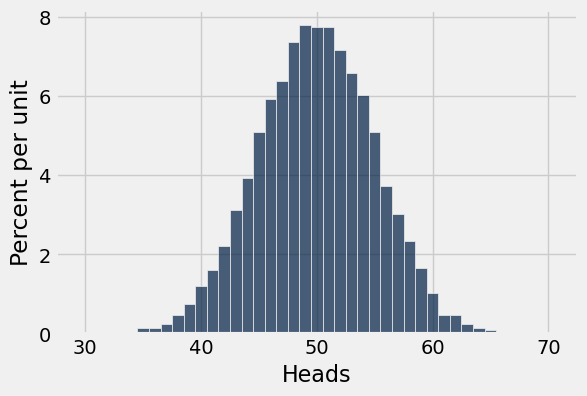

In [9]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

# Lecture 14 #

Box contains cards labeled R, B, and G. I **draw two cards at random without replacement**.

### Chance of two events both occurring ###
What is the chance that I get G followed by B?

(both "get G first" and "get B second")

### Chance of an event that can happen in multiple ways ###
What is the chance that one of the ticket is G and the other is B?

### Challenge Question 1 ###

**Without calculation:** What is the chance that the second card drawn is B?

### Challenge Question 2 ###

I have a deck of 52 cards. It contains four aces, one of which is the ace of hearts.

I shuffle the deck and deal 13 cards. 

**Without calculation:** What is the chance that the 12th card is the ace of hearts?

### Chance of At Least One Success in Independently Repeated Success/Failure Trials ###

In [10]:
# Chance of no sixes in 4 rolls of a die

prob_no_sixes_in_four_rolls = (5/6)**4
prob_no_sixes_in_four_rolls

0.4822530864197532

In [12]:
# Chance of at least one six in 4 rolls of a die
1-prob_no_sixes_in_four_rolls

0.5177469135802468

In [13]:
# Chance of at least one six in n rolls of a die

rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls | Chance of at least one 6
1     | 0.166667
2     | 0.305556
3     | 0.421296
4     | 0.517747
5     | 0.598122
6     | 0.665102
7     | 0.720918
8     | 0.767432
9     | 0.806193
10    | 0.838494
... (40 rows omitted)

In [14]:
results.scatter('Rolls')

### The Monty Hall Problem ###

In [58]:
goats = make_array('first goat', 'second goat')

In [59]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [60]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [61]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [62]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [63]:
monty_hall_game()

['second goat', 'first goat', 'car']

In [64]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())


In [65]:
games.show(10)

In [66]:
original_choice = games.group('Guess')
original_choice

Guess       | count
car         | 3374
first goat  | 3348
second goat | 3278

In [67]:
remaining_door = games.group('Remaining')
remaining_door

Remaining   | count
car         | 6626
first goat  | 1662
second goat | 1712

In [68]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item        | Original Door | Remaining Door
car         | 3374          | 6626
first goat  | 3348          | 1662
second goat | 3278          | 1712

In [69]:
combined.barh(0)

In [71]:
import numpy as np
from datascience import Table

# Define the goats and the function to get the other goat
goats = np.array(['first goat', 'second goat'])
def other_goat(x):
    return 'second goat' if x == 'first goat' else 'first goat'

# Define the items behind the doors
hidden_behind_doors = np.append(goats, 'car')

# Define the Monty Hall game simulation
def monty_hall_game():
    """Return [contestant's guess, what Monty reveals, what remains behind the other door]"""
    contestant_guess = np.random.choice(hidden_behind_doors)
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    elif contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    elif contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

# Simulate the games
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in np.arange(10000):
    games.append(monty_hall_game())

# Display first few results
games.show(3)

# Group and analyze results
original_choice = games.group('Guess')
remaining_door = games.group('Remaining')
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')

# Display the analysis
combined.show()
combined.barh(0)


In [ ]:
import numpy as np
from datascience import Table

# Define the doors and the function to get the other doors
def other_doors(doors, guess, revealed):
    return [door for door in doors if door != guess and door != revealed]

# Define the Monty Hall game simulation for 100 doors
def monty_hall_game_100():
    """Return [contestant's guess, what Monty reveals, what remains behind the other door]"""
    doors = np.append(['goat'] * 99, 'car')
    np.random.shuffle(doors)
    
    contestant_guess = np.random.choice(doors)
    doors_list = list(doors)
    doors_list.remove(contestant_guess)

    if contestant_guess == 'car':
        revealed = np.random.choice(['goat'] * 99)
    else:
        revealed = 'goat'
        while revealed == 'goat':
            potential_reveal = np.random.choice(doors_list)
            if potential_reveal != 'car':
                revealed = potential_reveal

    remaining_doors = other_doors(doors, contestant_guess, revealed)
    remaining_door = np.random.choice(remaining_doors)
    return [contestant_guess, revealed, remaining_door]

# Simulate the games
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in np.arange(10000):
    games.append(monty_hall_game_100())

# Display first few results
games.show(3)

# Group and analyze results
original_choice = games.group('Guess')
remaining_door = games.group('Remaining')
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')

# Display the analysis
combined.show()
combined.barh(0)
